In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [24]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

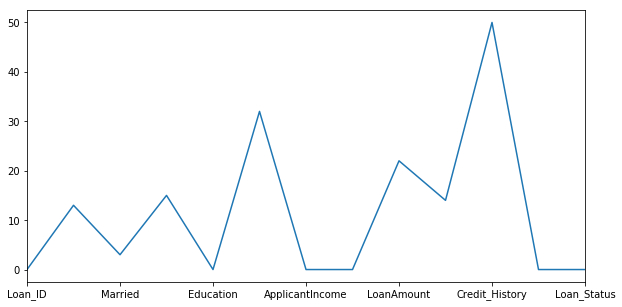

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
data.isna().sum().plot(figsize=(10,5))
#data.isna().sum().plot()
#data.isna().sum().plot(kind='bar')
#data.isna().sum().plot(kind='barh',label=True)
#data.isna().sum().plot(kind='hist')
#data.isna().sum().plot(kind='density')
#data['Credit_History'].plot(kind='density')
#data[data['Credit_History']==1.0][['Credit_History']]
#plt.legend()

In [6]:
data = data.dropna()

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
X = data.loc[:,['ApplicantIncome','LoanAmount','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area']]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 6 columns):
ApplicantIncome      480 non-null int64
LoanAmount           480 non-null float64
CoapplicantIncome    480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 26.2+ KB


In [9]:
import matplotlib.pyplot as plt
X.hist()
plt.show()

<Figure size 640x480 with 6 Axes>

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb = LabelEncoder()
X['Property_Area'] =lb.fit_transform(X['Property_Area'])

In [12]:
X.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
1,4583,128.0,1508.0,360.0,1.0,0
2,3000,66.0,0.0,360.0,1.0,2
3,2583,120.0,2358.0,360.0,1.0,2
4,6000,141.0,0.0,360.0,1.0,2
5,5417,267.0,4196.0,360.0,1.0,2


In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_ =scale.fit_transform(X)
X_

E:\hp\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\hp\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.13796959, -0.20808917, -0.02795204,  0.27554157,  0.41319694,
        -1.31886834],
       [-0.4175358 , -0.97900085, -0.604633  ,  0.27554157,  0.41319694,
         1.25977445],
       [-0.49118022, -0.30756164,  0.29710022,  0.27554157,  0.41319694,
         1.25977445],
       ...,
       [ 0.47820635,  1.34616826, -0.51285354,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.39184635,  0.52552034, -0.604633  ,  0.27554157,  0.41319694,
         1.25977445],
       [-0.13796959, -0.14591887, -0.604633  ,  0.27554157, -2.42015348,
        -0.02954695]])

In [14]:
X.corr()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
ApplicantIncome,1.000000,0.495310,-0.112588,-0.010838,-0.056152,-0.053160
LoanAmount,0.495310,1.000000,0.190740,0.050867,-0.040773,-0.109685
CoapplicantIncome,-0.112588,0.190740,1.000000,-0.005775,-0.008692,0.006540
Loan_Amount_Term,-0.010838,0.050867,-0.005775,1.000000,0.032937,-0.058656
Credit_History,-0.056152,-0.040773,-0.008692,0.032937,1.000000,-0.003013
Property_Area,-0.053160,-0.109685,0.006540,-0.058656,-0.003013,1.000000


In [15]:
import numpy as np
y = data.loc[:,['Loan_Status']]
y = lb.fit_transform(y)

E:\hp\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


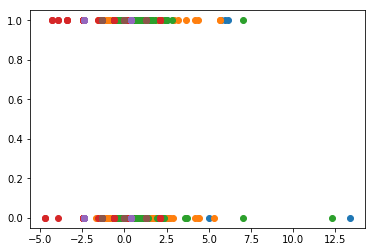

In [16]:
plt.plot(X_,y,'o')

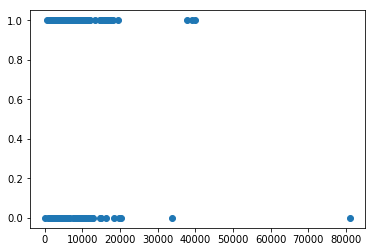

In [17]:
plt.plot(X['ApplicantIncome'],y,'o')

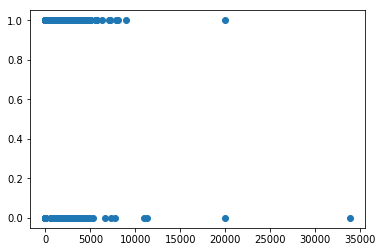

In [18]:
plt.plot(X['CoapplicantIncome'],y,'o')

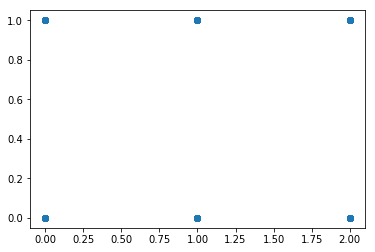

In [19]:
plt.plot(X['Property_Area'],y,'o')

### Training

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(solver='liblinear')

In [22]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
model.score(X,y)*100

80.83333333333333

## Testing

In [24]:
test = pd.read_csv('test.csv')

In [25]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [27]:
test = test.dropna()

In [28]:
test_data = test.loc[:,['ApplicantIncome','LoanAmount','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area']]

In [29]:
test_data[:2]

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,5720,110.0,0,360.0,1.0,Urban
1,3076,126.0,1500,360.0,1.0,Urban


In [30]:
test_data['Property_Area'] = lb.fit_transform(test['Property_Area'])

In [31]:
test_data[:2]

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,5720,110.0,0,360.0,1.0,2
1,3076,126.0,1500,360.0,1.0,2


In [32]:
predict=model.predict(test_data)
predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

# Predictions

## The eligible customers who will get a Loan

In [33]:
test_data[predict==1]

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,5720,110.0,0,360.0,1.0,2
1,3076,126.0,1500,360.0,1.0,2
2,5000,208.0,1800,360.0,1.0,2
4,3276,78.0,0,360.0,1.0,2
5,2165,152.0,3422,360.0,1.0,2
6,2226,59.0,0,360.0,1.0,1
9,2400,123.0,2400,360.0,1.0,1
10,3091,90.0,0,360.0,1.0,2
14,4666,124.0,0,360.0,1.0,1
15,5667,131.0,0,360.0,1.0,2


## The non-eligible customers who will not get a loan

In [34]:
test_data[predict==0]

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
7,3881,147.0,0,360.0,0.0,0
25,0,148.0,24000,360.0,0.0,0
35,3150,176.0,0,360.0,0.0,1
55,2750,130.0,0,360.0,0.0,2
58,2779,176.0,3664,360.0,0.0,1
63,2101,108.0,1500,360.0,0.0,0
66,4700,135.0,0,360.0,0.0,1
67,3445,130.0,0,360.0,0.0,1
69,2458,188.0,5105,360.0,0.0,0
80,3829,163.0,1103,360.0,0.0,2


## 2. Identify customer segments from given data and categorize customer into one of the segments.

In [35]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [36]:
data[['ApplicantIncome','CoapplicantIncome','Loan_Status']].groupby('Loan_Status').count()

,ApplicantIncome,CoapplicantIncome
Loan_Status,,
N,148,148
Y,332,332


In [37]:
data[['ApplicantIncome','LoanAmount','Loan_Status']].groupby('Loan_Status').count()

,ApplicantIncome,LoanAmount
Loan_Status,,
N,148,148
Y,332,332


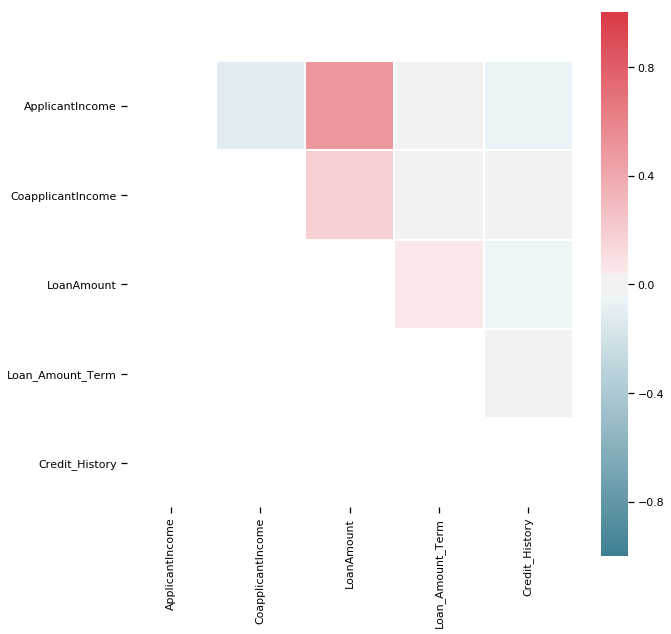

In [43]:
import seaborn as sns
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

In [38]:
data[['Loan_Amount_Term','LoanAmount','Loan_Status']].groupby('Loan_Status').count()

,Loan_Amount_Term,LoanAmount
Loan_Status,,
N,148,148
Y,332,332


In [39]:
data[['LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].groupby('Credit_History').count()

,LoanAmount,Loan_Amount_Term,Loan_Status
Credit_History,,,
0.0,70,70,70
1.0,410,410,410


In [40]:
data[['LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].groupby('Loan_Amount_Term').count()

,LoanAmount,Credit_History,Loan_Status
Loan_Amount_Term,,,
36.0,2,2,2
60.0,2,2,2
84.0,3,3,3
120.0,3,3,3
180.0,36,36,36
240.0,2,2,2
300.0,9,9,9
360.0,411,411,411
480.0,12,12,12


In [41]:
data[['LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].groupby(['Loan_Amount_Term','Loan_Status']).count()

LoanAmount  Credit_History
Loan_Amount_Term Loan_Status                            
36.0             N                     2               2
60.0             Y                     2               2
84.0             N                     1               1
                 Y                     2               2
120.0            Y                     3               3
180.0            N                    12              12
                 Y                    24              24
240.0            N                     1               1
                 Y                     1               1
300.0            N                     5               5
                 Y                     4               4
360.0            N                   119             119
                 Y                   292             292
480.0            N                     8               8
                 Y                     4               4

In [42]:
data[['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].groupby(['Loan_Amount_Term','Loan_Status']).count()

ApplicantIncome  LoanAmount  Credit_History
Loan_Amount_Term Loan_Status                                             
36.0             N                          2           2               2
60.0             Y                          2           2               2
84.0             N                          1           1               1
                 Y                          2           2               2
120.0            Y                          3           3               3
180.0            N                         12          12              12
                 Y                         24          24              24
240.0            N                          1           1               1
                 Y                          1           1               1
300.0            N                          5           5               5
                 Y                          4           4               4
360.0            N                        119         119             119
                 Y                        292         292             292
480.0            N                          8           8               8
                 Y                          4           4               4

### According to the all above Customer segmentation we can conclude that 'ApplicantIncome','Credit_History' and 'Loan_Amount_Term' are key parameters on which we have to focus more  while issuing the loan

### 3.)

### If customer is not eligible for the input required amount and duration:
 #### a.)	what can be amount for the given duration.
   #### b.)	if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

### a)

In [44]:
model.predict([[5720,110.0,0,360.0,1.0,2]]) #------- positive sample

array([1])

In [45]:
model.predict([[0,1475156453121.0,0,360.0,0.0,0]])#------- 1 negative

array([0])

In [46]:
model.predict([[0,11503,0,360.0,0.0,0]]) #------- 2 negative

array([0])

In [47]:
model.predict([[654546,11503,0,360.0,0.0,2]])#------3 negative

array([0])

In [48]:
model.predict([[0,100,0,360.0,1.0,0]]) #-------4

array([1])

#### Eligibility is based on Credit of that customer

In [49]:
"""If we see positive sample at start it consist of almost important inputs and giving positive output
of load eligibility but if we analyze the next three equation then we will clearly understand 
out Loan eligiblitiy is not based on loan amount at all.
1.Eligibility is based on Credit of that customer
one more important thing that we can observe here is if we set credit score to 1 manually then 
only for 3 digit LoanAmount loan will get issued.
2. when we go for more than 3 digit LoanAmount then Duration is important.
Let us consider below examples. For same amount and duration equal or greater 
than 275  load will not be granted but for duration below 275 loan will be granted"""

'If we see positive sample at start it consist of almost important inputs and giving positive output\nof load eligibility but if we analyze the next three equation then we will clearly understand \nout Loan eligiblitiy is not based on loan amount at all.\n1.Eligibility is based on Credit of that customer\none more important thing that we can observe here is if we set credit score to 1 manually then \nonly for 3 digit LoanAmount loan will get issued.\n2. when we go for more than 3 digit LoanAmount then Duration is important.\nLet us consider below examples. For same amount and duration equal or greater \nthan 275  load will not be granted but for duration below 275 loan will be granted'

In [50]:
model.predict([[0,1000,0,275.0,1.0,0]])

array([0])

In [51]:
model.predict([[0,1000,0,274.0,1.0,0]])

array([1])

### b)

SyntaxError: invalid syntax (<ipython-input-52-177c18ee2757>, line 1)

In [56]:
#As the problem statement given for duration is less than equal to 20 years means days less than
20*365 

7300

In [ ]:
"""In below testing I am taking a sample from non-eligible customer sample"""

In [57]:
model.predict([[3829,163.0,1103,360.0,0.0,2]])

array([0])

In [59]:
model.predict([[3829,163.0,1103,7229.0,0.0,2]])

array([0])

In [60]:
model.predict([[3829,163.0,1103,7300.0,0.0,2]])

array([0])

In [ ]:
""" All above are the transition on different Durations on same data but it is not affecting
the result
Hence we can conclude: if duration is less than equal to 20 years will not decide, is customer 
eligible for required amount for some longer duration.
Duration is not responcible to decide Loan eligibility
"""